In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
# load data awal yang sudah di cleaning 
dat=pd.read_csv('datafull.csv')
dat['TANGGAL']=pd.to_datetime(dat['TANGGAL'])
dat.head(3)

,TANGGAL,KOMODITI,SATUAN,HARGA
0,2018-01-02,Beras Medium,Kg,11340.0
1,2018-01-03,Beras Medium,Kg,11440.0
2,2018-01-04,Beras Medium,Kg,11490.0


In [3]:
# satuan harga Telur Ayam kampung adalah butir, agar dapat dibandingkan dengan telur ayam ras,
# nilai harga telur ayam kampung dikali 20 dengan asumsi bahwa 1 butir telur ayam kampung rata-rata 50gr
dat.loc[dat.KOMODITI=='Telur Ayam Kampung','HARGA']=dat.loc[dat.KOMODITI=='Telur Ayam Kampung','HARGA']*20

In [4]:
# membuat data frame baru berbentuk tabel dua arah dengan nama komoditas unutk nama tiap kolomnya
dats=pd.DataFrame()
arrnam = dat.KOMODITI.unique()
for i in arrnam:
    temp=dat[dat.KOMODITI==i].groupby('TANGGAL').HARGA.max()
    dats[i]=temp
dats.head(3)

,Beras Medium,Gula Pasir,Minyak Goreng Bimoli Botol,Minyak Goreng Curah,Ayam Boiler,Ayam Kampung,Telur Ayam Ras,Telur Ayam Kampung,Susu Kental Manis Kaleng Merk Bendera,Susu Kental Manis Kaleng Merk Indomilk,...,Kacang Hijau,Kacang Tanah,Ketela Pohon,Daging Sapi Lokal Paha Belakang,Daging Sapi Lokal Has Luar Sirloin,Daging Sapi Lokal Sandung Lamur Brisket,Daging Sapi Lokal Tetelan,Daging Sapi Impor Beku,Daging Sapi Lokal Has Dalam,Beras Premium
TANGGAL,,,,,,,,,,,,,,,,,,,,,
2018-01-02,11340.0,13740.0,14040.0,12388.0,39740.0,55075.0,26150.0,42000.0,12340.0,10300.0,...,22340.0,25500.0,5060.0,117660.0,118333.0,89167.0,70833.0,120000.0,143333.0,NaN
2018-01-03,11440.0,13840.0,14240.0,12450.0,38940.0,55075.0,26200.0,43000.0,12240.0,10400.0,...,22540.0,25700.0,5060.0,117660.0,117500.0,89167.0,75000.0,120000.0,141667.0,NaN
2018-01-04,11490.0,13390.0,14240.0,12575.0,37440.0,53825.0,26300.0,42000.0,11940.0,10600.0,...,22540.0,25600.0,5060.0,117660.0,118333.0,95000.0,80000.0,120000.0,146667.0,NaN


In [5]:
# Melihat nilai korelasi antar tiap komoditas
c = dats.corr().abs()
s = c.unstack()
so = s.sort_values(kind="sort", ascending = False)
kor = pd.DataFrame(so)
kor.columns=['Korelasi']
korelasi = pd.DataFrame(kor['Korelasi'].drop_duplicates())

In [6]:
kor_sangat_kuat = korelasi[((korelasi['Korelasi']<1) & (korelasi['Korelasi']>=0.8))]
kor_kuat = korelasi[((korelasi['Korelasi']<0.8) & (korelasi['Korelasi']>=0.6))]
kor_sedang = korelasi[((korelasi['Korelasi']<0.6) & (korelasi['Korelasi']>=0.4))]
kor_rendah = korelasi[((korelasi['Korelasi']<0.4) & (korelasi['Korelasi']>=0.2))]
kor_sangat_rendah = korelasi[((korelasi['Korelasi']<0.2) & (korelasi['Korelasi']>=0.1))]

In [7]:
# Komoditas dengan korelasi 0.8-1.0
kor_sangat_kuat

,,Korelasi
Bawang Putih Impor Honan,Bawang Putih Impor Kating,0.852795
Daging Sapi Lokal Paha Belakang,Garam Beryodium Bata,0.849791


In [8]:
# Komoditas dengan korelasi 0.6-0.8
kor_kuat

Korelasi
Daging Sapi Impor Beku             Kacang Kedelai Lokal  0.742218
Bawang Putih Impor Kating          Cabai Merah Besar     0.734750
Bawang Putih Impor Honan           Cabai Merah Besar     0.724711
Cabai Merah Besar                  Cabai Merah Kriting   0.689627
Cabai Rawit Merah                  Cabai Merah Kriting   0.674621
Bawang Putih Impor Kating          Bawang Merah Medium   0.674124
Bawang Putih Impor Honan           Bawang Merah Medium   0.660224
Cabai Rawit Merah                  Gula Pasir            0.656843
Cabai Rawit Hijau                  Gula Pasir            0.648663
                                   Cabai Rawit Merah     0.618076
Daging Sapi Lokal Has Luar Sirloin Cabai Merah Besar     0.608534

In [9]:
# Mengganti data outlier dengan nilai median
def chg_out(df_new):
    import numpy as np
    for i in df_new.columns:
        median = df_new[i].median()
        Q1 = df_new[i].quantile(0.25)
        Q3 = df_new[i].quantile(0.75)
        IQR = Q3 - Q1
        df_new[i] = np.where((df_new[i] < Q1 - 1.5 * IQR) | (df_new[i] > Q3 + 1.5 * IQR), median,df_new[i])
    return(df_new)
dats=chg_out(dats)

In [10]:
# membuat dataframe harga rata-rata tiap komoditas untuk tiap bulan
dats['bulan']=dats.index.strftime("%m")
data_bulan=dats.groupby('bulan').mean().round(2)
del dats['bulan']
data_bulan.head()

,Beras Medium,Gula Pasir,Minyak Goreng Bimoli Botol,Minyak Goreng Curah,Ayam Boiler,Ayam Kampung,Telur Ayam Ras,Telur Ayam Kampung,Susu Kental Manis Kaleng Merk Bendera,Susu Kental Manis Kaleng Merk Indomilk,...,Kacang Hijau,Kacang Tanah,Ketela Pohon,Daging Sapi Lokal Paha Belakang,Daging Sapi Lokal Has Luar Sirloin,Daging Sapi Lokal Sandung Lamur Brisket,Daging Sapi Lokal Tetelan,Daging Sapi Impor Beku,Daging Sapi Lokal Has Dalam,Beras Premium
bulan,,,,,,,,,,,,,,,,,,,,,
01,11032.41,13734.09,13463.64,12472.27,37660.00,81125.77,24804.09,43136.36,11993.18,10336.36,...,22410.91,25109.09,4879.09,119130.91,119356.05,95257.68,73590.86,88077.27,145302.95,NaN
02,11065.37,13893.16,13324.26,12425.74,35930.53,82082.89,22908.95,45336.84,12228.42,10127.37,...,22165.26,24537.89,5157.37,119938.95,119912.21,93921.16,69271.95,88552.63,145596.47,13163.16
03,10881.43,13524.29,13402.62,12548.62,37359.05,83926.67,22323.81,47552.38,12204.29,10287.14,...,22445.71,24785.71,5037.14,121108.57,120277.81,94103.19,68063.62,88371.43,146071.43,12815.81
04,10988.10,12921.90,13210.62,12601.90,37374.29,83347.24,22817.14,45819.05,11847.14,10410.48,...,22373.33,25403.81,5300.95,119826.67,119841.24,89880.95,66904.71,87459.52,147222.24,12700.19
05,10798.50,12914.50,13368.00,12407.00,38468.00,85883.35,25399.00,46340.00,11866.50,10044.00,...,22296.00,24710.00,5244.00,119535.00,119833.35,89583.30,68874.90,85667.50,147791.70,12654.45


In [11]:
# membuat data series rata-rata tiap komoditas untuk tiap harinya
rata_hari=dat.groupby('TANGGAL').HARGA.mean()
rata_hari.head(3)

TANGGAL
2018-01-02    40181.405405
2018-01-03    40375.459459
2018-01-04    41047.648649
Name: HARGA, dtype: float64

In [12]:
# membuat rata-rata seluruh komoditass untuk tiap bulan
dat['bulan']=dat.set_index('TANGGAL').index.strftime("%m")
rata_bulan=dat.groupby('bulan').mean().round(2)
del dat['bulan']
rata_bulan.head(3)

,HARGA
bulan,
01,40982.43
02,40536.04
03,41754.02


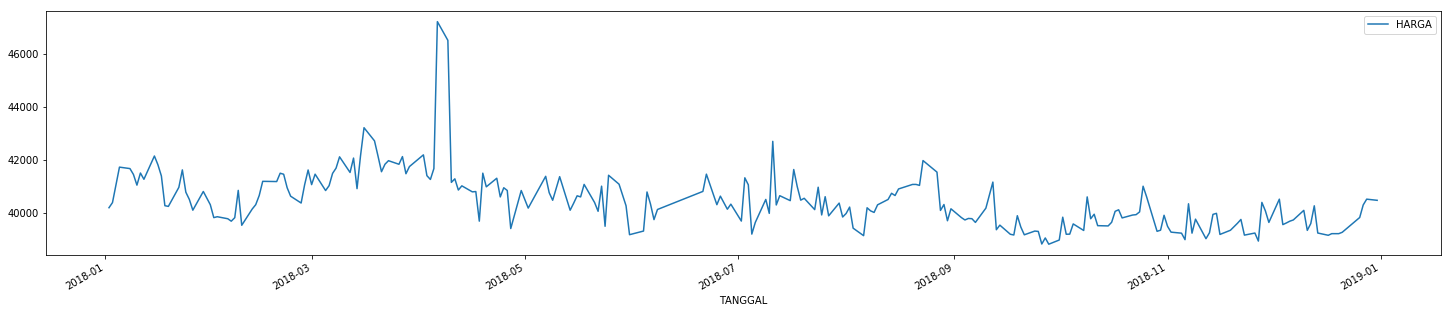

In [13]:
# Menampilkan perubahan rata-rata harga seluruh komoditas tiap harinya
plt.figure(figsize=(25,5))
rata_hari.plot()
plt.legend()

In [14]:
# melihat hari dimana rata-rata komoditas paling tinggi
rata_hari[rata_hari==rata_hari.max()]

TANGGAL
2018-04-06    47232.552632
Name: HARGA, dtype: float64

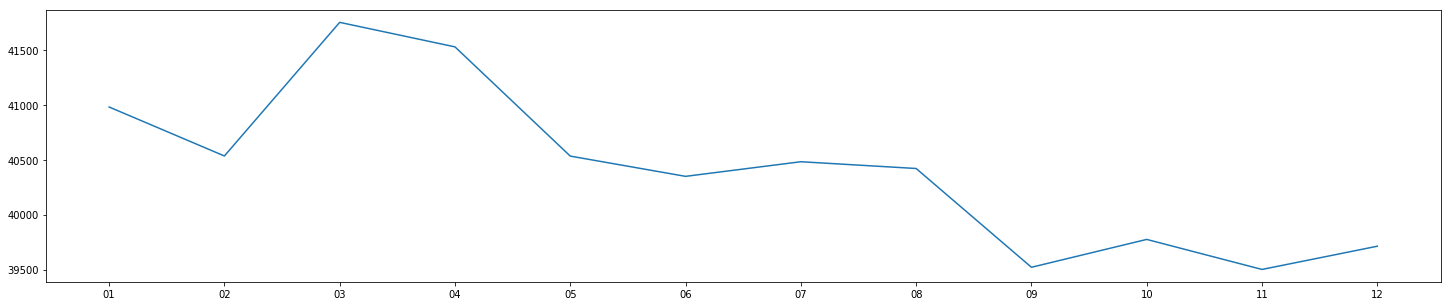

In [15]:
# Menampilkan perubahan rata-rata harga seluruh komoditas tiap bulannya
plt.figure(figsize=(25,5))
plt.plot(rata_bulan)
#plt.legend()

In [16]:
# melihat bulan dimana rata-rata komoditas paling tinggi
rata_bulan.HARGA[rata_bulan.HARGA==rata_bulan.HARGA.max()]
# terjadi di bulan 03 atau Maret

bulan
03    41754.02
Name: HARGA, dtype: float64

In [17]:
# Menampilkan rangkuman statistik dari tiap komoditas
rangkum=dat.groupby('KOMODITI').HARGA.aggregate(['min','max','mean','std'])
rangkum.head()

,min,max,mean,std
KOMODITI,,,,
Ayam Boiler,33340.0,43000.0,36997.238494,1529.225895
Ayam Kampung,53825.0,105567.0,83625.665272,6593.273914
Bawang Merah Medium,22560.0,42840.0,31154.100418,4664.961195
Bawang Putih Impor Honan,22500.0,45000.0,29204.769874,4363.659209
Bawang Putih Impor Kating,26200.0,50000.0,33791.066946,5727.376008


In [20]:
# Komoditas dengan nilai standar deviasi paling kecil
rangkum[rangkum['std']==rangkum['std'].min()]

,min,max,mean,std
KOMODITI,,,,
Indomie Rasa Kari Ayam,2280.0,2800.0,2431.610879,58.936827


In [19]:
# Menmpilkan komoditas dengan rata-rata dibawwah rata-rata seluruh komoditas
rangkum[rangkum['mean']<rangkum['mean'].mean()]
#rangkum[rangkum['mean']>rangkum['mean'].mean()].sort_values(by='mean')


,min,max,mean,std
KOMODITI,,,,
Ayam Boiler,33340.0,43000.0,36997.238494,1529.225895
Bawang Merah Medium,22560.0,42840.0,31154.100418,4664.961195
Bawang Putih Impor Honan,22500.0,45000.0,29204.769874,4363.659209
Bawang Putih Impor Kating,26200.0,50000.0,33791.066946,5727.376008
Beras Medium,10350.0,13387.5,10962.782427,556.690833
Beras Premium,9688.0,13763.0,12740.889401,427.346582
Cabai Merah Kriting,28300.0,55200.0,38692.092050,5931.849214
Cabai Rawit Hijau,27240.0,47300.0,36713.556485,4022.025952
Garam Beryodium Bata,3000.0,11240.0,3829.635983,632.878436


In [21]:
# Membuat kelompok komoditas yang setipe
daging=dats.iloc[:,31:37]
biji=dats.iloc[:,[0,12,37]]
bumbu=dats.iloc[:,[1,13,14]]
minyak=dats.iloc[:,2:4]
ayam=dats.iloc[:,4:6]
telur=dats.iloc[:,6:8]
susu = dats.iloc[:,10:12]
kentalmanis=dats.iloc[:,8:10]
kacang=dats.iloc[:,[16,17,28,29]]
cabai=dats.iloc[:,19:23]
bawang=dats.iloc[:,23:26]
ikan=dats.iloc[:,26:28]
indomie=dats['Indomie Rasa Kari Ayam']

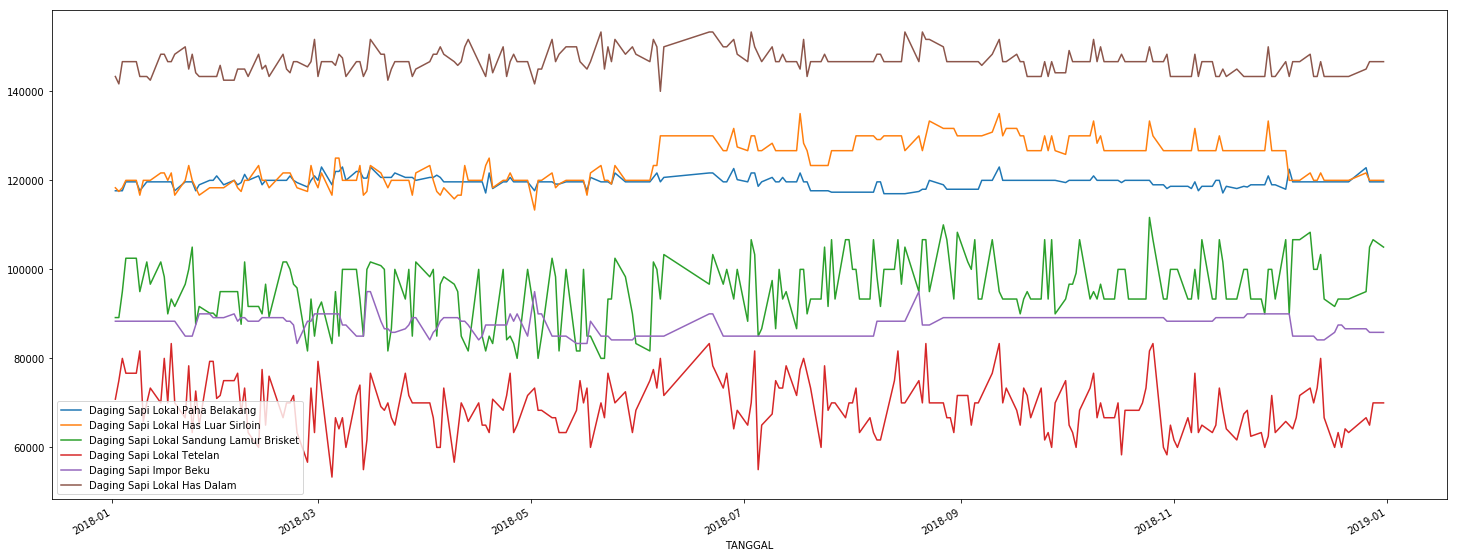

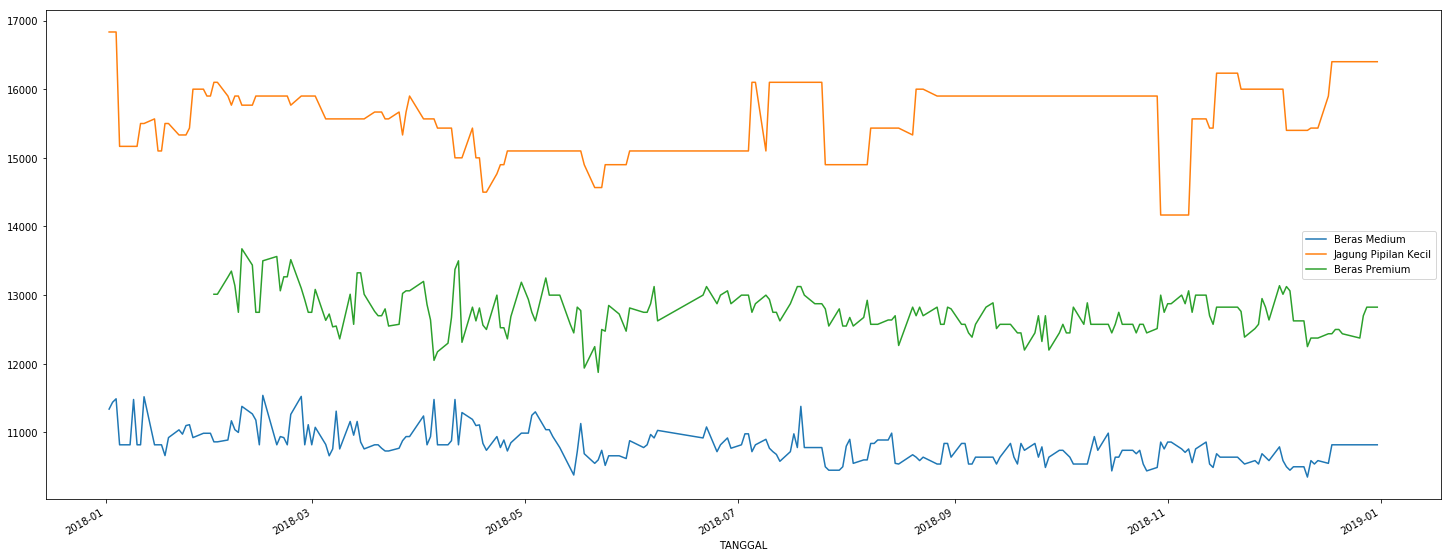

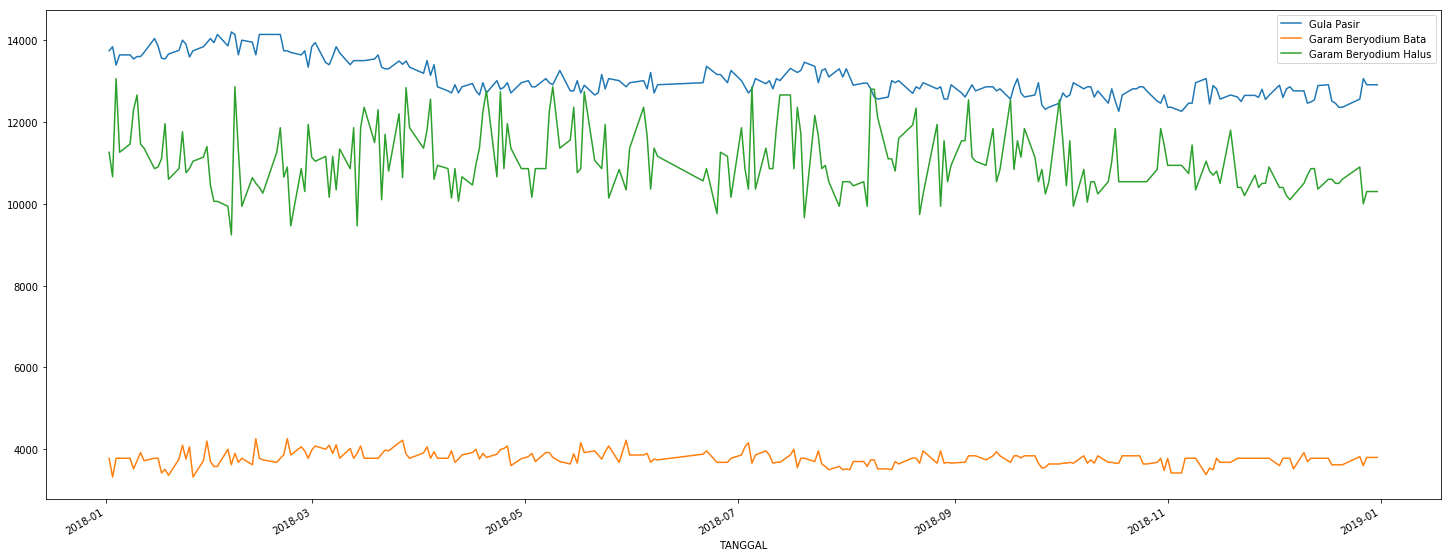

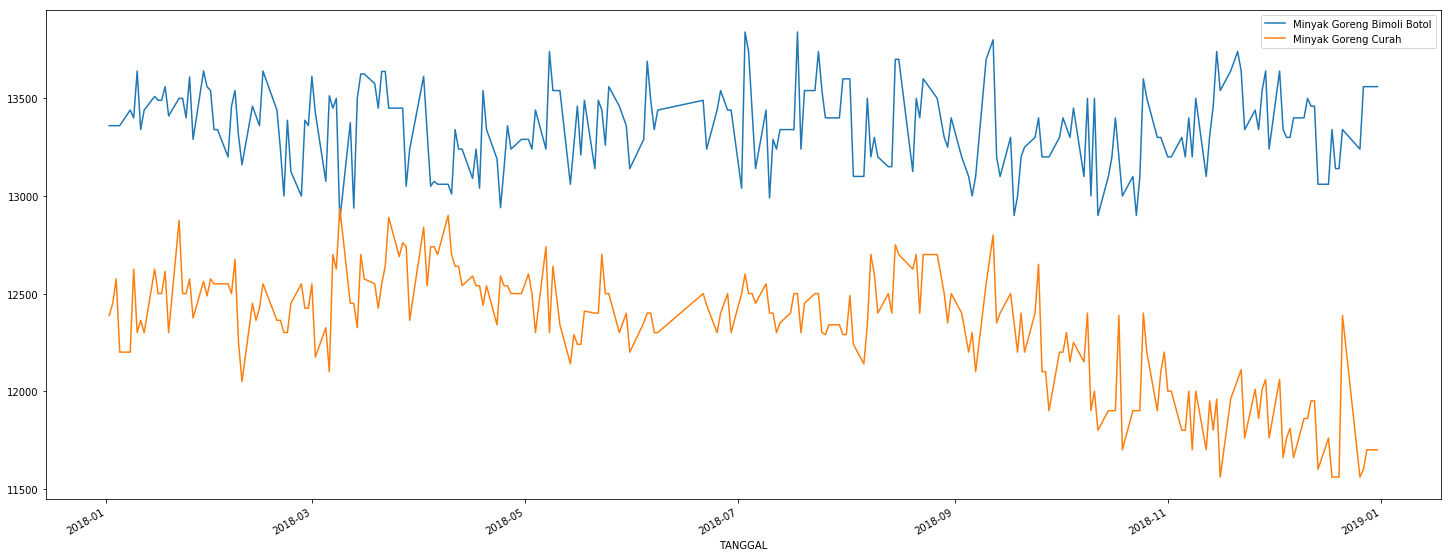

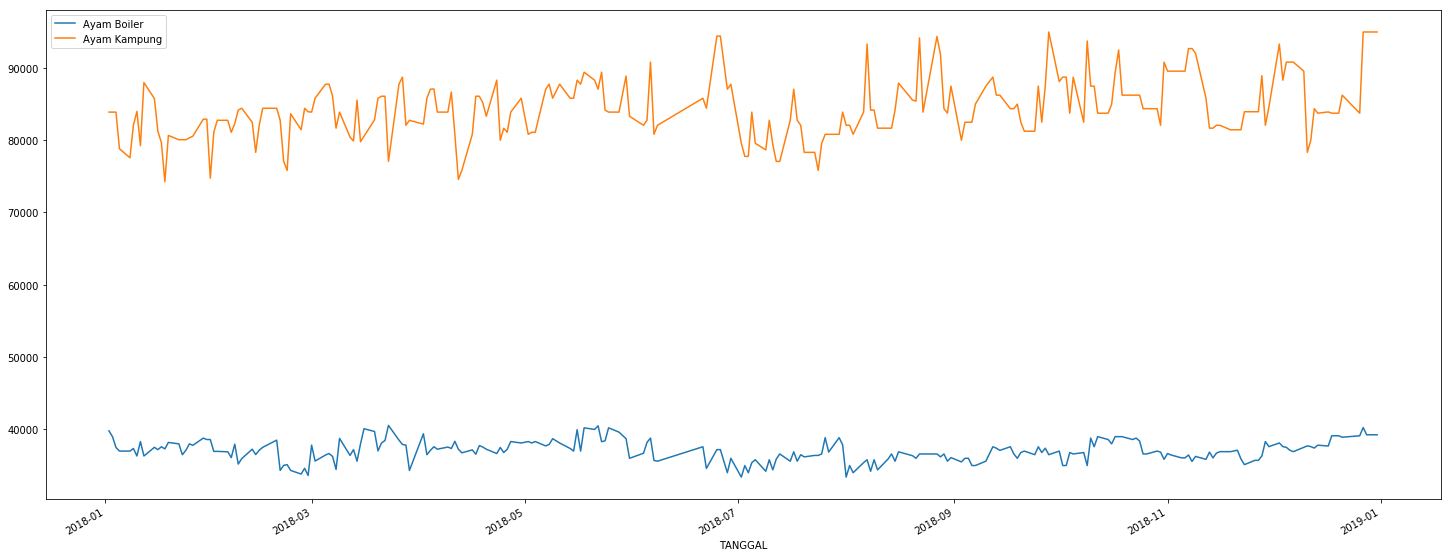

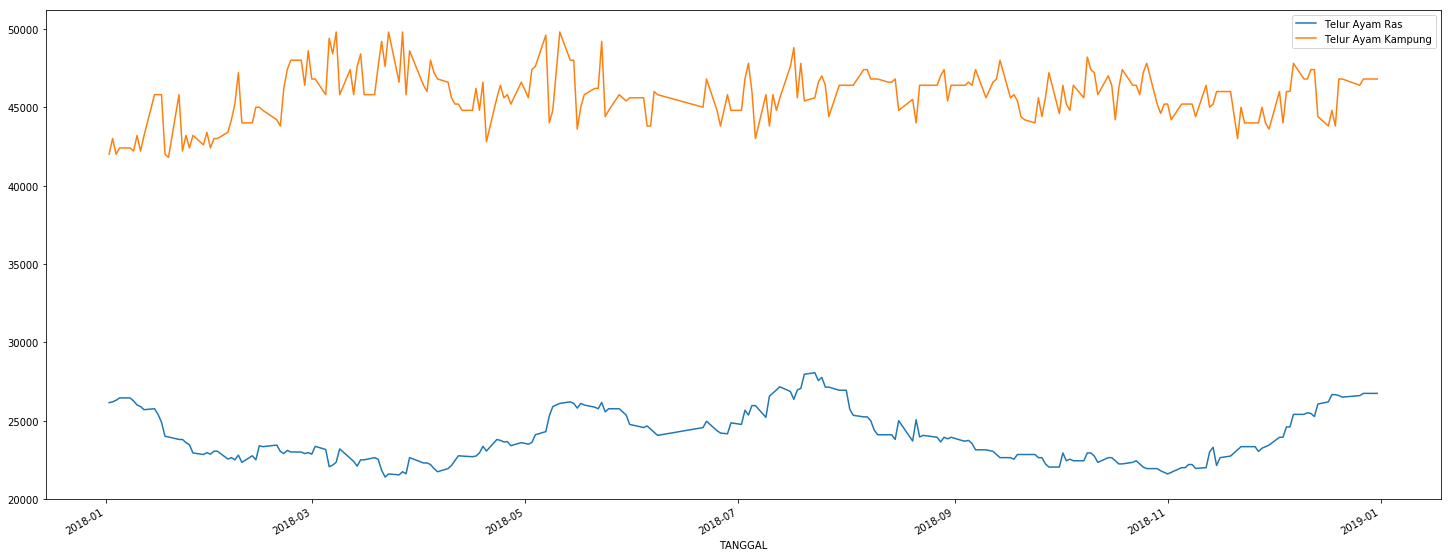

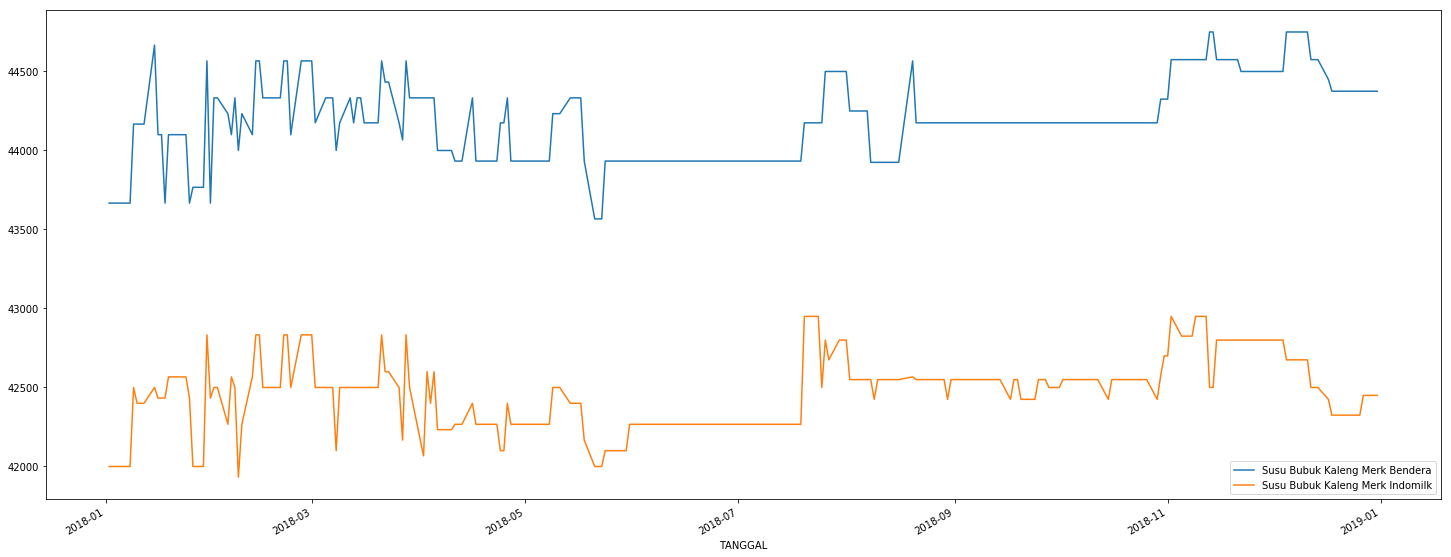

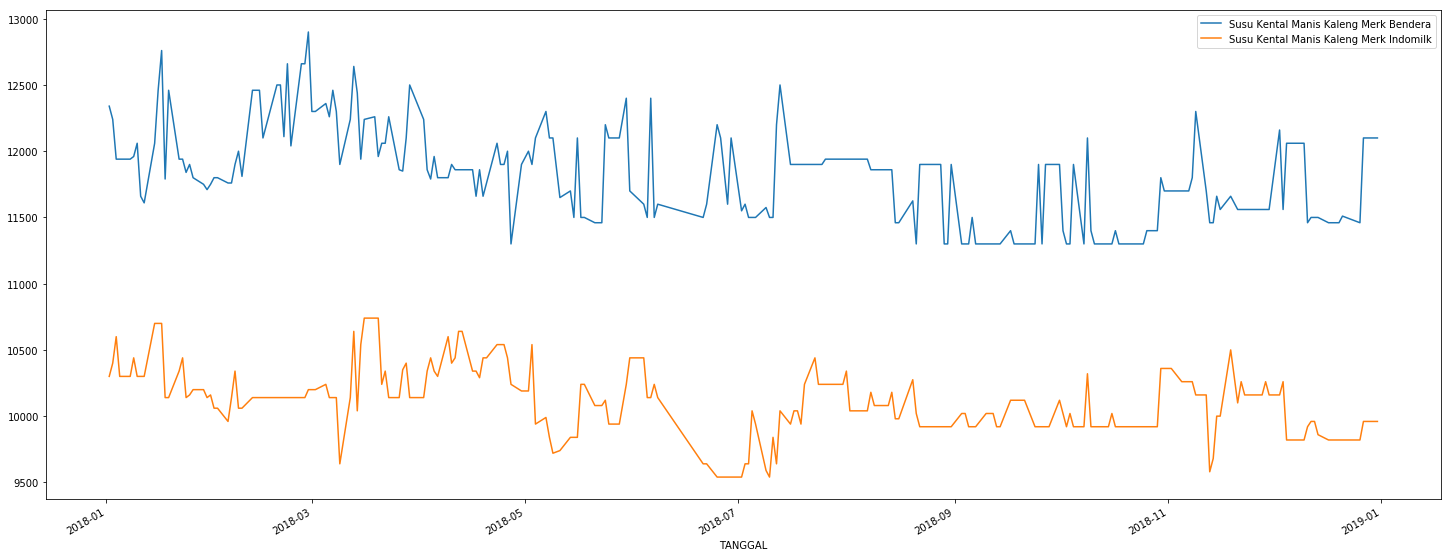

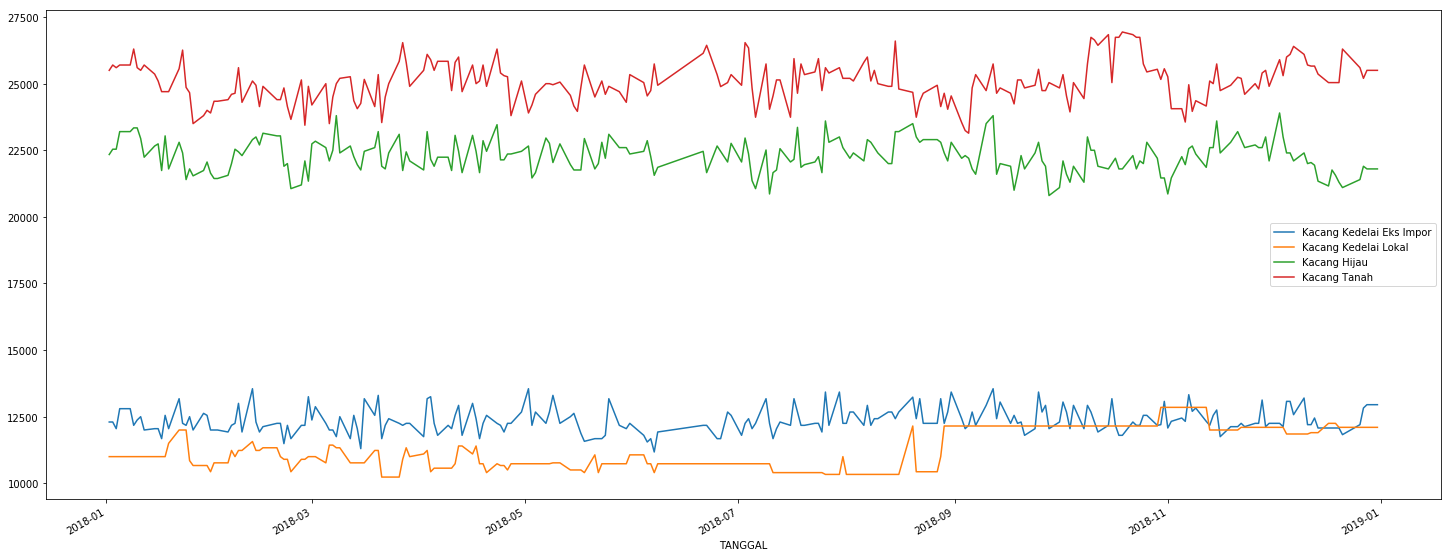

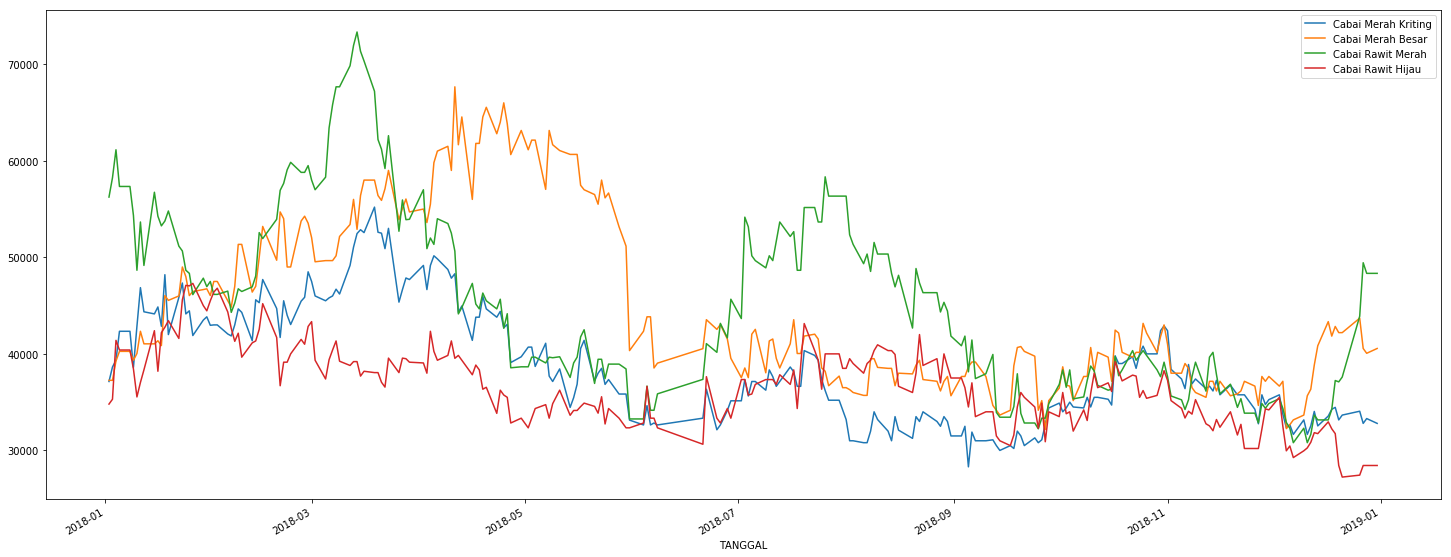

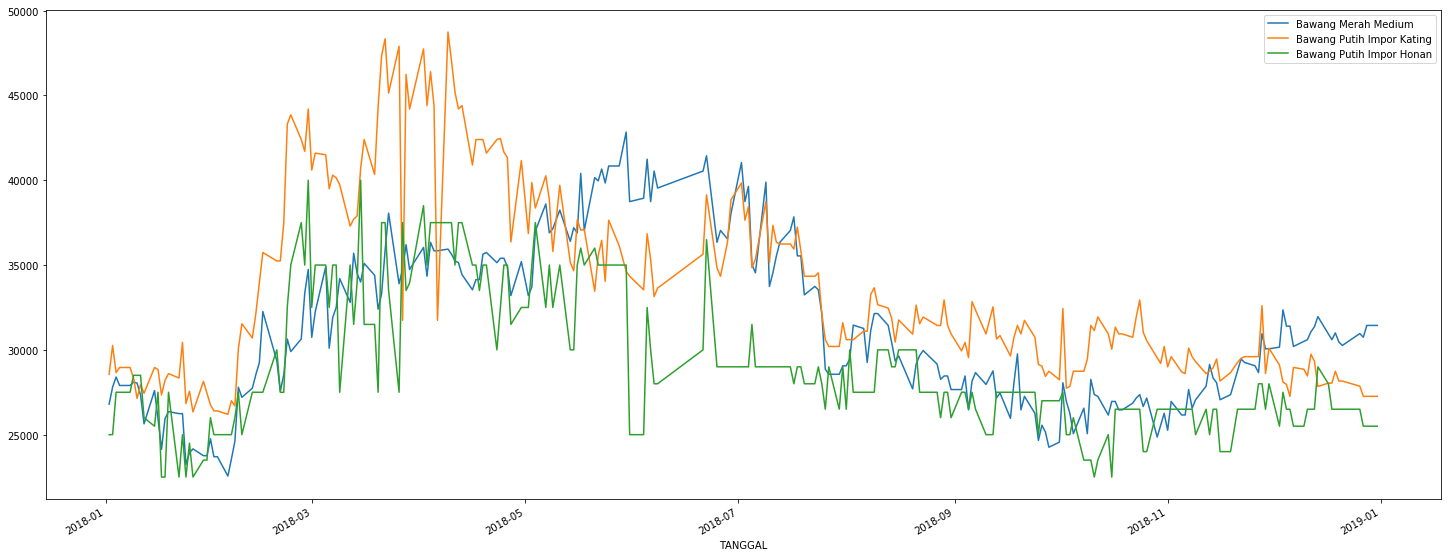

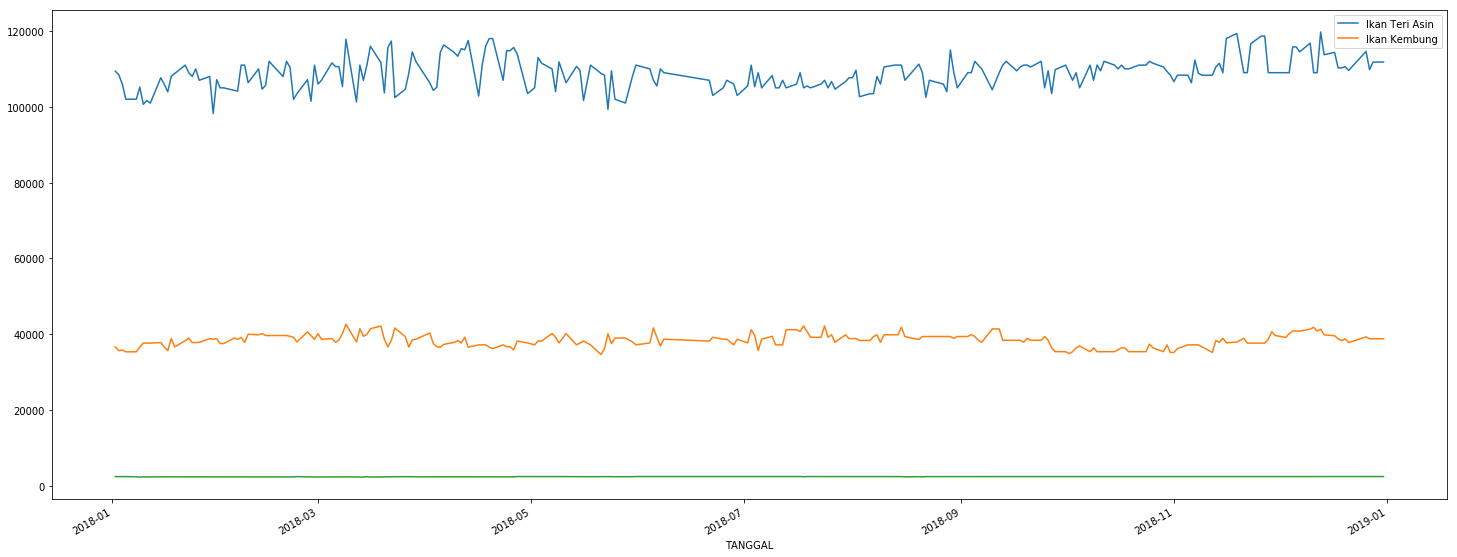

In [25]:
# Menampilkan plot untuk tiap kelompok komoditas
daging.plot(figsize=(25,10))
biji.plot(figsize=(25,10))
bumbu.plot(figsize=(25,10))
minyak.plot(figsize=(25,10))
ayam.plot(figsize=(25,10))
telur.plot(figsize=(25,10))
susu.plot(figsize=(25,10))
kentalmanis.plot(figsize=(25,10))
kacang.plot(figsize=(25,10))
cabai.plot(figsize=(25,10))
bawang.plot(figsize=(25,10))
ikan.plot(figsize=(25,10))
indomie.plot(figsize=(25,10))